In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import warnings
import os
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import plot , iplot ,init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
data = pd.read_excel(r'dataset\flow_data.xlsx')
data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641


In [3]:
data.shape

(362, 7)

In [4]:
# pd.set_option('display.precision',9)
settings_data = pd.read_excel(r'dataset\flow_settings.xlsx')
settings_data.head()

,timestamp,setting_name,setting_value
0,20191119080640,IGNORE_EXIT_ERRORS,X
1,20191119080640,IGNORE_TABLE_ERRORS,NaN
2,20191119080640,LOCK_SOURCE_CLIENT,NaN
3,20191119080640,PARALLEL_NUMBER,30
4,20191119080640,USE_EXCLUSIVE_LOCKS,X


In [5]:
flow_settings=pd.DataFrame(settings_data.pivot(index='timestamp', columns='setting_name', values='setting_value')).reset_index().rename_axis(None, axis=1)
flow_settings.sample(5)

,timestamp,IGNORE_EXIT_ERRORS,IGNORE_TABLE_ERRORS,LOCK_SOURCE_CLIENT,PARALLEL_NUMBER,USE_EXCLUSIVE_LOCKS,USE_TABLE_SEGMENTER
468,20191028100236,X,NaN,NaN,6,X,NaN
250,20190715193021,NaN,NaN,NaN,7,NaN,NaN
347,20190824060814,NaN,NaN,X,1,X,X
76,20190410090746,NaN,NaN,X,10,NaN,NaN
3,20190131121445,NaN,NaN,NaN,10,NaN,NaN


##### Lets join both tables

In [6]:
cc_data = data.join(flow_settings.set_index('timestamp'),on= 'timestamp',how='inner')
cc_data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed,IGNORE_EXIT_ERRORS,IGNORE_TABLE_ERRORS,LOCK_SOURCE_CLIENT,PARALLEL_NUMBER,USE_EXCLUSIVE_LOCKS,USE_TABLE_SEGMENTER
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,NaN,NaN,6,NaN,NaN
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,NaN,NaN,6,NaN,NaN
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,NaN,NaN,X,7,X,NaN
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,NaN,NaN
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,NaN,NaN,6,X,NaN


In [7]:
cc_data.columns = map(str.lower,cc_data.columns)
cc_data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,NaN,NaN,6,NaN,NaN
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,NaN,NaN,6,NaN,NaN
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,NaN,NaN,X,7,X,NaN
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,NaN,NaN
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,NaN,NaN,6,X,NaN


### Cleaning Data

In [8]:
# Lets see how many NaN values are present
cc_data.isna().sum()

timestamp                           0
copy_mode                           0
profile                             0
total_runtime                       0
status                              0
records_processed                   0
total_data_processed                0
ignore_exit_errors                162
ignore_table_errors               278
lock_source_client                212
parallel_number                     0
use_exclusive_locks               212
use_table_segmenter               335
dtype: int64

In [9]:
cc_data.fillna(0,inplace=True)
cc_data.isna().sum()

timestamp                         0
copy_mode                         0
profile                           0
total_runtime                     0
status                            0
records_processed                 0
total_data_processed              0
ignore_exit_errors                0
ignore_table_errors               0
lock_source_client                0
parallel_number                   0
use_exclusive_locks               0
use_table_segmenter               0
dtype: int64

In [10]:
cc_data.columns

Index(['timestamp', 'copy_mode', 'profile', 'total_runtime', 'status',
       'records_processed', 'total_data_processed',
       'ignore_exit_errors            ', 'ignore_table_errors           ',
       'lock_source_client            ', 'parallel_number               ',
       'use_exclusive_locks           ', 'use_table_segmenter           '],
      dtype='object')

In [11]:
cc_data.columns = cc_data.columns.str.replace(' ', '')
cc_data.columns

Index(['timestamp', 'copy_mode', 'profile', 'total_runtime', 'status',
       'records_processed', 'total_data_processed', 'ignore_exit_errors',
       'ignore_table_errors', 'lock_source_client', 'parallel_number',
       'use_exclusive_locks', 'use_table_segmenter'],
      dtype='object')

In [12]:
cc_data['status'] = cc_data['status'].str.replace(" ","")
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())

    except:
        pass
    return x

# Apply remove_whitespace to column only
cc_data = cc_data.apply(remove_whitespace)
cc_data.status.value_counts()

FINISHED     281
CANCELLED     80
Name: status, dtype: int64

In [13]:
# import pandas_profiling
# pandas_profiling.ProfileReport(cc_data)

# Rename Columns
cc_data.rename(columns={'total_runtime':'runtime_in_ms',
                        'total_data_processed' : 'size_in_bytes',
                       },
              inplace=True)


In [14]:
cc_data.head()

,timestamp,copy_mode,profile,runtime_in_ms,status,records_processed,size_in_bytes,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,0,0,6,0,0
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,0,0,6,0,0
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,0,0,X,7,X,0
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,0,0
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,0,0,6,X,0


In [15]:
# Change to numeric columns
cc_data[['runtime_in_ms','records_processed','size_in_bytes','parallel_number']] = \
cc_data[['runtime_in_ms','records_processed','size_in_bytes','parallel_number']].apply(pd.to_numeric)


#### Lets check the distribution of runtime data for local client copy

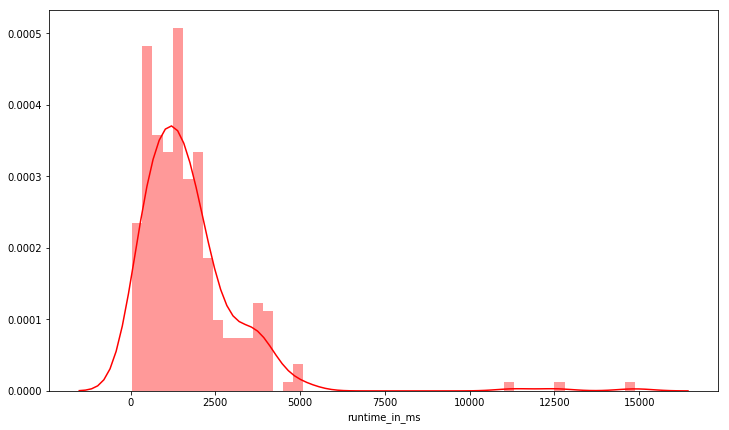

In [16]:
cc_data['copy_mode'] = cc_data['copy_mode'].str.strip()
criteria = cc_data.copy_mode=='LOCAL'
plt.figure(figsize=(12,7))
sns.distplot(cc_data.loc[criteria]['runtime_in_ms'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()


Here we can see that there are a few outliers that have comparatively high runtimes

#### Plot for Processed records

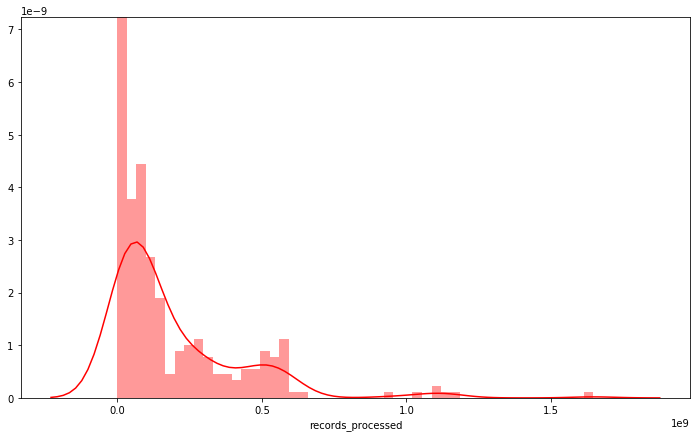

In [17]:
plt.figure(figsize=(12,7))
sns.distplot(cc_data.loc[criteria]['records_processed'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()

##### The data is right skewed

#### Plot the distribution for size copied in bytes

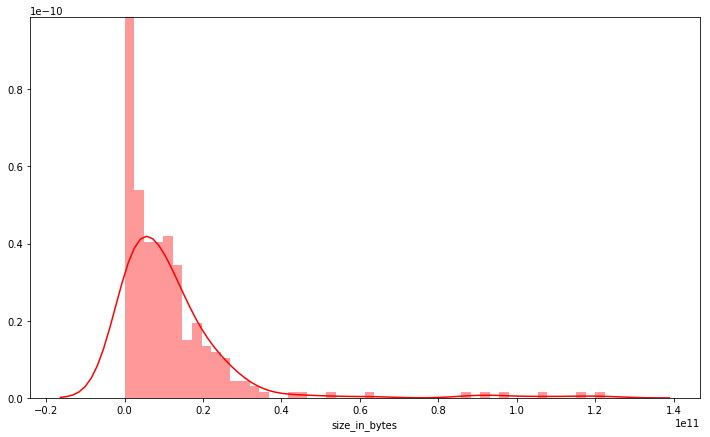

In [18]:
plt.figure(figsize=(12,7))
sns.distplot(cc_data.loc[criteria]['size_in_bytes'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()

In [19]:
cc_data.describe()

,timestamp,runtime_in_ms,records_processed,size_in_bytes,parallel_number
count,361,361,361,361,361
mean,20190784131893,4181,223259233,14423810028,8
std,204039183,41826,362906728,26216755498,5
min,20190430044556,13,0,0,0
25%,20190607104954,529,18329049,1534435820,6
50%,20190815182824,1334,89658494,6627857295,7
75%,20190918090851,2246,273542779,13405474528,10
max,20191119103532,795047,2178681778,158639896060,35


In [20]:
# Check the number of local client copy samples
cc_data.copy_mode.value_counts()

LOCAL     273
REMOTE     32
CMPLCL     22
DELETE     12
SIZE        9
IMPORT      7
EXPORT      6
Name: copy_mode, dtype: int64

Remove all other modes of cc , because lets fight one battle a day !

In [21]:
criteria = (cc_data.copy_mode=='LOCAL') & (cc_data.status == 'FINISHED')
local_cc_data = cc_data.loc[criteria]
# dont need timestamp, copy_mode
local_cc_data.drop(columns = ['timestamp','copy_mode'],inplace=True)
local_cc_data.head()

,profile,runtime_in_ms,status,records_processed,size_in_bytes,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter
0,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,0,0,6,0,0
1,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,0,0,6,0,0
5,SAP_UCSV,2875,FINISHED,152299974,13405474528,X,0,0,6,X,0
8,SAP_UCSV,1176,FINISHED,50315435,3035348648,X,0,0,6,0,0
9,SAP_ALL,1180,FINISHED,82981731,9182413424,X,0,0,6,0,0


### Standardization & Handling Categorical variables

In [22]:
# List the data types, so that we know what kind 
# of preprocessing is required
local_cc_data.dtypes

profile                object
runtime_in_ms           int64
status                 object
records_processed       int64
size_in_bytes           int64
ignore_exit_errors     object
ignore_table_errors    object
lock_source_client     object
parallel_number         int64
use_exclusive_locks    object
use_table_segmenter    object
dtype: object

Earlier we replaced the NaN values in the settings variable (binary variables) to O. Now, to be able to use the data with Machine Learning Algorithms we have to replace the X with 1.
so : 
- 1--> X
- 0--> (SPACE)     

In [23]:
local_w_dummies = pd.get_dummies(local_cc_data ,
                                 columns=[col for col in local_cc_data.columns.tolist() 
                                          if local_cc_data[col].dtype in ['object']
                                         ] 
)
local_w_dummies.head()

,runtime_in_ms,records_processed,size_in_bytes,parallel_number,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,1290,30619937,2721723523,6,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,1192,48666506,3902691720,6,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
5,2875,152299974,13405474528,6,0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
8,1176,50315435,3035348648,6,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
9,1180,82981731,9182413424,6,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [24]:
if not os.path.isfile('./dataset/cc_cleaned_data.csv'):
    local_w_dummies.to_csv('./dataset/cc_cleaned_data.csv')

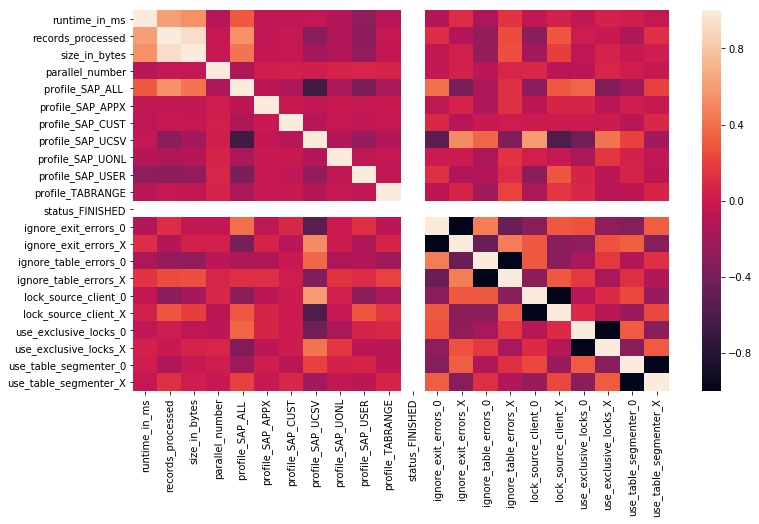

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(local_w_dummies.corr())
# local_w_dummies.corr()

Lets separate the features and the target variables

In [26]:
target = pd.DataFrame(local_w_dummies.runtime_in_ms)
features = local_w_dummies.drop(['runtime_in_ms'],axis=1)

In [27]:
# numeric_features = features.select_dtypes(include=['int64']).columns.tolist()
# features[numeric_features] = features[numeric_features].astype(float)
# features.sample(5)



Now lets scale all numeric features

In [28]:
numeric_features = features.select_dtypes(include=['int64']).columns.tolist()

scaler = StandardScaler()
# scaler.fit(features[numeric_features])
# features[numeric_features]=scaler.transform(features[numeric_features])
# target = scaler.transform(target)

In [29]:
features.head()

,records_processed,size_in_bytes,parallel_number,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,profile_TABRANGE,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,30619937,2721723523,6,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,48666506,3902691720,6,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5,152299974,13405474528,6,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
8,50315435,3035348648,6,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
9,82981731,9182413424,6,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(features ,target ,test_size = 0.3)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_test

array([[-0.79121307, -0.72927427,  0.42614616, ..., -0.91515026,
         0.31147219, -0.31147219],
       [-0.66378367, -0.52297245, -0.43198378, ..., -0.91515026,
         0.31147219, -0.31147219],
       [-0.77470416, -0.72977699, -0.21745129, ...,  1.09271673,
         0.31147219, -0.31147219],
       ...,
       [ 1.1021882 ,  0.62842536,  0.42614616, ..., -0.91515026,
         0.31147219, -0.31147219],
       [ 0.27685856,  0.02356448,  0.42614616, ...,  1.09271673,
        -3.2105595 ,  3.2105595 ],
       [-0.77879767, -0.72329221,  0.42614616, ...,  1.09271673,
         0.31147219, -0.31147219]])

In [32]:
X_train

array([[ 0.1640645 ,  0.04194124,  0.42614616, ..., -0.91515026,
         0.31147219, -0.31147219],
       [-0.78033839, -0.69352291, -0.43198378, ..., -0.91515026,
         0.31147219, -0.31147219],
       [-0.72605238, -0.58296342, -0.43198378, ...,  1.09271673,
         0.31147219, -0.31147219],
       ...,
       [-0.7329251 , -0.60058181, -0.43198378, ..., -0.91515026,
         0.31147219, -0.31147219],
       [ 0.03239564, -0.03781782,  0.42614616, ..., -0.91515026,
         0.31147219, -0.31147219],
       [-0.24795107,  0.0655192 , -0.43198378, ...,  1.09271673,
         0.31147219, -0.31147219]])

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgbModel = xgb.XGBRegressor()
# xgbModel.fit(X_train ,y_train)
# y_xgb_predictions = xgbModel.predict(X_test)
# print(y_xgb_predictions)


In [34]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 15, 'alpha': 10}
dtrain_mat = xgb.DMatrix(X_train, y_train)
cv_results = xgb.cv(dtrain=dtrain_mat, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:16:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:16:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:16:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2482,286,2449,543
1,2331,294,2320,546
2,2176,262,2217,562
3,2069,259,2111,583
4,1934,242,2015,594


In [36]:
print((cv_results["test-rmse-mean"]).tail(1))
# predictions = [round(value) for value in y_xgb_predictions]
# rmse = np.sqrt(mean_squared_error(y_test,y_xgb_predictions))

21   1548
Name: test-rmse-mean, dtype: float64


In [37]:
# print("RMSE: %f" % (rmse))

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [39]:
linear_preds=regressor.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,linear_preds)

-3.1607464875584315

In [41]:
regressor.score(X_test,y_test)

-3.1607464875584315

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

xgb_pipeline = Pipeline([("xgbmod", xgb.XGBRFRegressor())])
xgb_param_grid = {'xgbmod__subsample': np.arange(.05,.1,.05),
                  'xgbmod__objective': ['reg:linear'],
                  'xgbmod__max_depth': np.arange(3,20,1),
                  'xgbmod__colsample_bytree':np.arange(0.1,1.05,0.05),
                  'xgbmod__learning_rate':np.arange(0.05 ,1 ,0.05),
                  'xgbmod__n_estimators':np.arange(50,200 ,50)}
search = RandomizedSearchCV(estimator=xgb_pipeline,
                            param_distributions=xgb_param_grid,
                            n_iter=10,
                            cv=9,
#                             verbose=1,
                            n_jobs =-1,
                            scoring='r2',
                            return_train_score=True)
search.fit(X_train,y_train)

[23:16:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=9, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('xgbmod', XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.8, verbosity=1))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'xgbmod__subsample': array([0.05]), 'xgbmod__objective': ['reg:linear'], 'xgbmod__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'xgbmod__colsample_bytree': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       ...   0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]), 'xgbmod__n_estimators': array([ 50, 100,

In [43]:
search.best_score_

0.08308231422021338

In [44]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [45]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

1352.2455825946806
0.4833038115614161
978.9602273808339
-0.08157784360948495


In [46]:
m_svr = SVR()
m_svr.fit(X_train, y_train) 
pred_train_rr= m_svr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= m_svr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

1931.2565489893245
-0.053911283023734935
940.120492050511
0.0025417547158422815


In [47]:
m_rr = RandomForestRegressor()
m_rr.fit(X_train, y_train) 
pred_train_rr= m_rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= m_rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

805.8743548359837
0.8164904010357615
858.1892850101602
0.16882234012112252


In [48]:
from sklearn.model_selection import GridSearchCV
random_regressor = RandomForestRegressor()
parameters = { 'max_features':np.arange(5,10),
              'n_estimators':[500],
              'min_samples_leaf': [10,50,100,200,500],
              'max_depth': [5,10,15]}
random_grid = GridSearchCV(random_regressor, parameters, cv = 5)
random_grid.fit(X_train, y_train)
pred_test_rr= random_grid.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

829.3444048216252
0.22375730832307206


In [49]:
# Hyper parameter Tuning Ridge Regression
ridge = Ridge()
parameters = {'alpha':[0.01, 0.024, 0.025, 0.026, 0.03]}
random_grid = GridSearchCV(ridge, parameters, cv = 9)
random_grid.fit(X_train, y_train)
pred_test_ridge= random_grid.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print(r2_score(y_test, pred_test_ridge))

977.8967361479927
-0.07922918073800167


In [50]:
pd.__version__

'0.24.2'

In [51]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train) 

pred_train_logistic= logistic.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_train_logistic))) 
print(r2_score(y_test, pred_train_logistic))

1072.9496871941387
-0.29923108025159806
